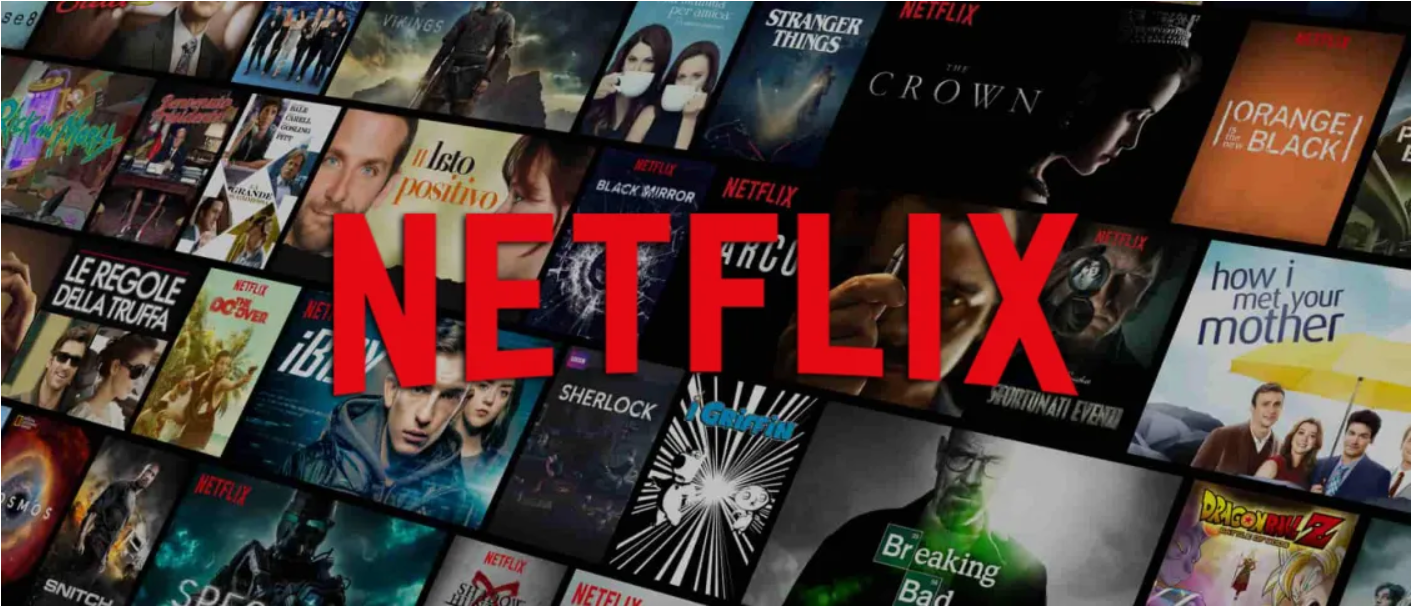

## Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device. You can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection. The company that started its run more than 20 years ago as a mail-order DVD rental service has since transformed its business model completely to match the ever-changing tech landscape. As a result, the company now boasts more than 200 million subscribers worldwide and secures a spot as one of the biggest media publishers in the world with its Netflix Originals program..

## TABLE OF CONTENT

### 0 ABOUT THE DATA

### 1 IMPORTING LIBRARIES

### 2 DATA DESCRIPTION AND DATA CLEANING

### 2.1 Import Data

### 2.2 Data types

### 2.3 Missing values

### 2.4 Duplicates

### 3 ANALYSIS

### 4 FINAL CONCLUSIONS

## 0 PROLOGUE

## In this work, exploratory data analysis has been carried out for what are the reasons which can effect the heart attack

# FEATURES:

###### SHOW-ID - Unique id of each show (not much of a use for us in this notebook)
###### TYPE - The category of a show, can be either a Movie or a TV Show
###### TITLE - Name of the show
###### DIRECTOR - Name of the director(s) of the show
###### CAST - Name of the show
###### COUNTRY - Name of countries the show is available to watch on Netflix
###### DATE ADDED - Date when the show was added on Netflix
###### RATING - Show rating on netflix
###### RELEASE YEAR - Release year of the show
###### DURATION - Time duration of the show
###### LISTED IN - Genre of the show

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno
import matplotlib.pyplot as plt
import plotly
import cufflinks
from plotly.offline import iplot
import plotly.graph_objects as go

In [89]:
plotly.offline.init_notebook_mode()

<p id="part4"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.1 Import Data</p>

## 2. DATA DESCRIPTION AND DATA CLEANING
#### In this block, Cleaning of the data will be carried out, data types, missing values, duplicates...

In [90]:
df=pd.read_csv("netflix_titles.csv")

In [91]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### As we see above in table's titile column not appropriate information is there hence we can drop it.

In [92]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set Contain 7787 Rows and 12 Columns


<p id="part5"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.2 Data Types</p>

In [93]:
#Check Data Types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<p id="part6"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.3 Missing values</p>

In [120]:
cufflinks.go_offline()

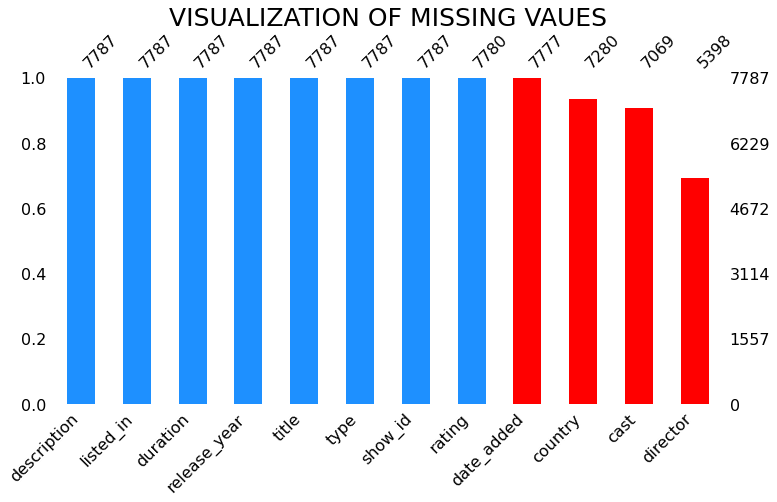

In [95]:
color = ['dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

<p style="font-family: Arials; font-size: 24px; font-style: normal; font-weight: normal; letter-spacing: 3px; line-height:1.0"> Most of the Values are Missing From Director Column and some of in Cast,Country and Date column </p>
<p style="font-family: Arials; font-size: 24px; font-style: normal; font-weight: normal; letter-spacing: 3px; line-height:1.0"> Let's impute the missing values:</p>

In [96]:
# handling missing values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<p id="part7"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.4 Duplicate Values:</p>

In [97]:
df.duplicated().sum()

0

<p style="font-family: Arials; font-size: 24px; font-style: normal; font-weight: normal; letter-spacing: 3px; line-height:1.0"> The dataset has no Duplicated Values:</p>

<p style="font-family: Arials; font-size: 24px; font-style: normal; font-weight: normal; letter-spacing: 3px; line-height:1.0"> Lets make some another Columns:</p>

In [98]:
#df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

<p id="part8"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.4 ANALYSIS:</p>

<p style="font-family: Arials; font-size: 30px; font-style: normal; font-weight: normal; letter-spacing: 3px; line-height:1.0"> Let's start Analysis:</p>

## Let's do some Analysis

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: blue">01. HOW CONTENT IS DISTRIBUTED:</p>

# Growth in content over the years

In [99]:
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), format="%B %d, %Y")
df['year_added'] = df['date_added'].dt.year
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### The Growth in number of movies on netflix is much higher than that of Tv Shows. About 1300 new movies added between 2018 and 2019.Netflix kept on adding different movies and tv shows on its platform over the years. This content was of different variety - content from different countries, content which was released over the years.

In [100]:
x=df["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: brown">So 69.1% content is Movies and 30.9% Content is Tv-shows:</p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: blue">02.COUNTRIES WITH HIGHEST NUMBER OF MOVIES & TV-SHOWS:</p>

In [101]:
# countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
# countries
df[df['country'] == "Mexico"].type.value_counts().sum()

100

In [102]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
fig = px.bar(countries, x=countries['country'], y = countries['type'], text='type', title="TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS", labels={"type" : "Count"})
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [103]:
m=df[df["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
fig1 = px.bar(movies, y = movies['index'], x = movies['country'], title="TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES", text='country', orientation='h', color_discrete_sequence=px.colors.qualitative.Antique_r)
fig1.update_traces(texttemplate = '%{text:.3s}', textposition = 'outside')
fig1.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide')
fig1.show()

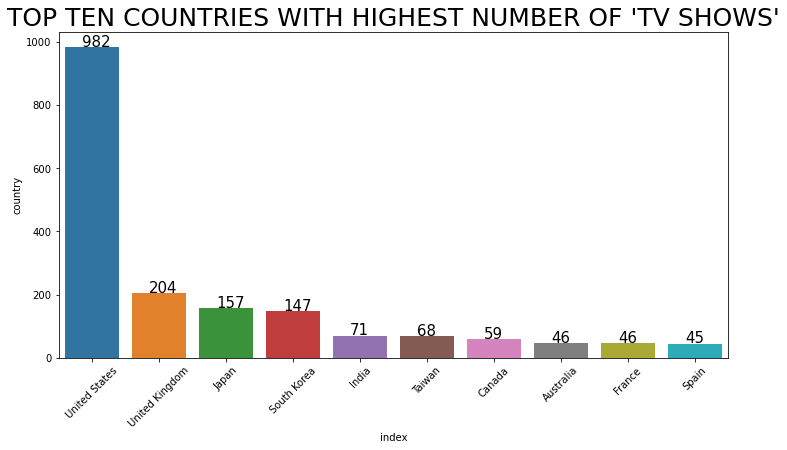

In [104]:
m=df[df["type"]=='TV Show']
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')


<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: brown">US has the highest number of Content Available:</p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: blue">03.CONTENT ADDED OVERS YEARS:</p>

In [105]:
gg = px.histogram(df['year'], title="CONTENT ADDED OVER YEARS", nbins=50, labels={"value" : "Year"})
gg.update_xaxes(tickvals = np.arange(2008, 2022))


<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: brown">Year 2019 Most of the Movies and Tv shows were Added. Then it Decreases May be the reason of Corona:</p>

D:\Aanconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



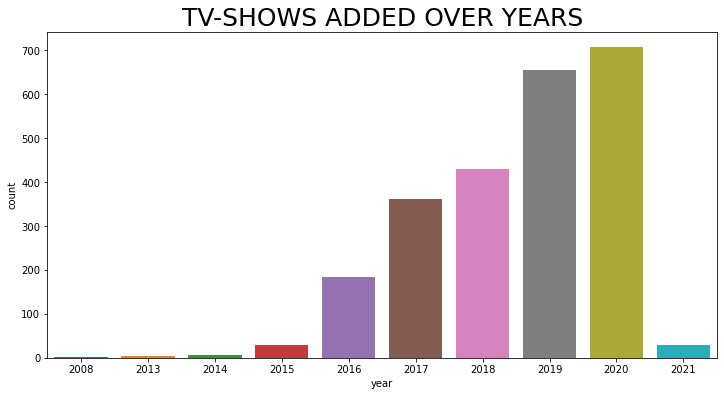

In [106]:
T=df[df["type"]=="TV Show"]
plt.figure(figsize=(12,6))
sns.countplot(T["year"])
plt.title("TV-SHOWS ADDED OVER YEARS",fontsize=25)
plt.show()

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: brown">Year 2019 Most of the Movies were Added.And in year 2020 Most of the Tv-Shows were added:</p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: blue">04.Genre:</p>

In [107]:
ff = px.pie(df,names="ratings_ages",values=df.index, labels={"index" : "Count"})
ff.update_traces(marker=dict(line=dict(color='#000000', width=2)))
# colors = ['lightcyan', 'cyan', 'royalblue', 'darkblue']

In [108]:
movies=df[df["type"]=="Movie"]
tv=df[df["type"]=="TV Show"]

In [109]:
px.pie(movies,names="ratings_ages",values=movies.index,title="Type of content present in movies", labels={"index" : "Count"},color_discrete_sequence=px.colors.sequential.RdBu)


In [110]:
tv = px.pie(tv,names="ratings_ages",values=tv.index,title="Type of content present in Tv shows", labels={"index" : "Count"})
tv.update_traces(marker=dict(line=dict(color='#000000', width=2)))

In [111]:
new=df[["type","year"]].value_counts().reset_index()
new.columns=["type","year","number"]
px.line(data_frame=new, x = 'year', y = 'number', color='type', title="TYPE ADEDED OVER YEARS", labels={"number" : "Count"})

# Distribution of Contents on basis of countries

In [112]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

country count
0   United States  3062
1           India   923
2  United Kingdom   397
3           Japan   226
4     South Korea   183

In [113]:
px.choropleth(data_frame=df_countries, locationmode='country names',locations=df_countries.country,
    labels=df_countries["count"], color_continuous_scale="Viridis", hover_data=['country','count'])

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: blue">05. RECOMMENDATION SYSTEM:</p>

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [116]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [117]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [118]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [119]:
get_recommendations('Our Godfather')

3392            Killing Them Softly
4633    Once Upon a Time in Mumbaai
106                        365 Days
4806                 Peaky Blinders
6288                   The Departed
5768                       Spotless
5718                           Soni
385           Ali Baba ve 7 Cüceler
2472                       Gomorrah
5495                Seoul Searching
Name: title, dtype: object